# `предсказательная машина V@nga v0.0000000.01`

In [159]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
#import scipy as scp
import time
import datetime
from sklearn.linear_model import LinearRegression, RidgeClassifier, LogisticRegression
#from sklearn.linear_model import Lasso, Ridge, LassoCV
from sklearn.model_selection import cross_val_score, train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
from sklearn.ensemble import GradientBoostingClassifier
import json
import bz2
        # Обработка матча
#        break

In [82]:
features = pd.read_csv('data/features.csv.zip', index_col='match_id')
features.head()

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,4,2,2,-52.0,2874,1,1796,0,51,0
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,4,3,1,-5.0,2463,1,1974,0,63,1
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,4,3,1,13.0,2130,0,0,1830,0,63
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,4,2,0,27.0,1459,0,1920,2047,50,63
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,3,3,0,-16.0,2449,0,4,1974,3,63


In [83]:
#plt.figure(figsize=(12, 12))

df = features.drop(["duration","radiant_win","tower_status_radiant","tower_status_dire",\
               "barracks_status_radiant","barracks_status_dire","lobby_type"], axis = 1)

df.fillna(value = {'first_blood_time': 301, 
                'first_blood_team': -1, 
                'first_blood_player1': -1,
                'first_blood_player2': -1,
                'radiant_bottle_time': 301,
                'radiant_courier_time': 301, 
                'radiant_flying_courier_time': 301, 
                'radiant_first_ward_time': 301, 
                'dire_bottle_time': 301,
                'dire_courier_time': 301,
                'dire_flying_courier_time': 301,
                'dire_first_ward_time': 301,}, inplace = True)

X = df
y = features['radiant_win']

def test_model(model, X, y):
    start_time = datetime.datetime.now()
    k_fold = KFold(n_splits=5, shuffle=True)
    learn = model.fit(X,y)
    scores = cross_val_score(learn, X, y, cv = k_fold, n_jobs=-1, scoring = "roc_auc")
    print(scores)
    print("\nСреднее: {}\nОтклонение:{}".format(scores.mean(),scores.std()))
    #print("=========================================================================================")
    print(model.predict_proba(X)[:, 1])
    print('Время: ')
    print(datetime.datetime.now() - start_time)

# Градиентный бустинг

In [17]:
for num in np.arange(10,101,10):
    print("\nОценка: {}\n".format(num))
    test_model(GradientBoostingClassifier(n_estimators=num), X, y)


Оценка: 10

[0.66307784 0.66348577 0.66984561 0.66734104 0.66458662]

Среднее: 0.6656673756171835
Отклонение:0.002564835486268705
[0.46464579 0.46218735 0.55879997 ... 0.53175239 0.58132466 0.55597223]
Время: 
0:00:41.548157

Оценка: 20

[0.68152909 0.68043292 0.6767792  0.68310505 0.68785964]

Среднее: 0.6819411815328421
Отклонение:0.003618661359898122
[0.46593768 0.4428471  0.59692558 ... 0.55420927 0.5943282  0.59826138]
Время: 
0:01:08.492295

Оценка: 30

[0.68990364 0.69270365 0.68442641 0.69176633 0.68639682]

Среднее: 0.6890393705569942
Отклонение:0.00315824731469201
[0.44940824 0.42762994 0.60620928 ... 0.56913241 0.61606855 0.63945169]
Время: 
0:01:34.954094

Оценка: 40

[0.6972293  0.6949057  0.69425155 0.69295678 0.69085192]

Среднее: 0.6940390474855114
Отклонение:0.0021120164504587857
[0.45832859 0.40594787 0.59097548 ... 0.58205884 0.62175115 0.6527713 ]
Время: 
0:02:04.004978

Оценка: 50

[0.70452464 0.68812848 0.69223038 0.70228909 0.69938418]

Среднее: 0.69731135351050

In [48]:
print('Отключаем отопление')
test_model(GradientBoostingClassifier(n_estimators=1500), X, y)

Отключаем отопление
[0.72488526 0.7282428  0.72562746 0.72446809 0.72392768]

Среднее: 0.7254302558338857
Отклонение:0.0015119409035344103
[0.85460978 0.71041644 0.53441605 ... 0.31746565 0.28308003 0.84793126]
Время: 
1:11:46.155928


# Отчет
+ Какие признаки имеют пропуски среди своих значений? Что могут означать пропуски в этих признаках (ответьте на этот вопрос для двух любых признаков
+ Как называется столбец, содержащий целевую переменную?
+ Как долго проводилась кросс-валидация для градиентного бустинга с 30 деревьями? Инструкцию по измерению времени можно найти ниже по тексту. Какое качество при этом получилось?...
+ Имеет ли смысл использовать больше 30 деревьев в градиентном бустинге? Что бы вы предложили делать, чтобы ускорить его обучение при увеличении количества деревьев?

### 1) 'first_blood_time', 'first_blood_team', 'first_blood_player1', 'first_blood_player2', 'radiant_bottle_time', 'radiant_courier_time', 'radiant_flying_courier_time', 'radiant_first_ward_time', 'dire_bottle_time', 'dire_courier_time', 'dire_flying_courier_time', 'dire_first_ward_time'. 
Пропуск в "first_blood" означает, что в матче первая кровь была после 5 минут игры. 
'radiant_bottle_time' - некторым персоонажем ботл не нужен или, при очень плохом раскладе, ботл купили после 5 минут игры.
'radiant_flying_courier_time' - опять же курьер может быть куплен после 5 минут игры или (в большинстве случаев) в команде нет саппортов.
'dire_first_ward_time' - аналогично курьеру.
### 2) ['radiant_win']
### 3) Быстро.
Среднее: 0.6893286719575882

Отклонение: 0.002995568893523436

Время: 0:01:36.537648

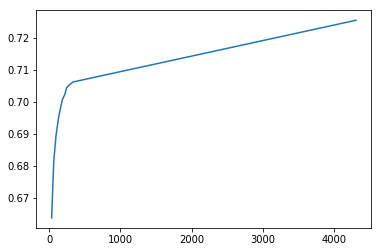

In [27]:
x_t = [36.240916, 65.208199, 96.537648, 130.804837, 153.454365, 183.600539, 220.300640, 248.035875, 288.476745, 336.891551, 4306.155928]
y_res = [0.6637589996942559, 0.6812996612112775, 0.6893286719575882, 0.6946971014961768, 0.6973113535105003, 0.7004752219553323, 0.7022831718334571, 0.7044384366807618, 0.7053398281381803, 0.7061759375047993,0.7254302558338857]
plt.plot(x_t, y_res)

Похоже, что время выполнения растет по параболе(очень похожей на натуральный логарифм)

### 4) Гулять, так гулять - 1500. 
Часик с лишним на 1500. Можно брать поменьше объектов.

Среднее: 0.7254302558338857

Отклонение: 0.0015119409035344103

Время: 1:11:46.155928

# Логистическая регрессия

In [37]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [72]:
for num in np.arange(0.1,1.0,0.1):
    test_model(LogisticRegression(C = num, penalty='l2'), X, y)

[0.51320383 0.51329986 0.51163615 0.51281352 0.51649293]

Среднее: 0.5134892582252789
Отклонение:0.0016143124384060395
[0.5183577  0.51835797 0.51835806 ... 0.51861537 0.51861538 0.51861565]
Время: 
0:00:06.657061
[0.51284738 0.51192563 0.51537667 0.51467413 0.51242876]

Среднее: 0.5134505136002139
Отклонение:0.001337188189606268
[0.5183577  0.51835797 0.51835806 ... 0.51861537 0.51861538 0.51861565]
Время: 
0:00:07.366016
[0.51256482 0.50971637 0.51747928 0.51081004 0.51663167]

Среднее: 0.5134404359471837
Отклонение:0.0031000187208135776
[0.5183577  0.51835797 0.51835806 ... 0.51861537 0.51861538 0.51861565]
Время: 
0:00:06.634310
[0.5106752  0.51459958 0.51185112 0.51793503 0.51205569]

Среднее: 0.5134233222701242
Отклонение:0.0025935872754704347
[0.5183577  0.51835797 0.51835806 ... 0.51861537 0.51861538 0.51861565]
Время: 
0:00:06.798003
[0.5131711  0.51668128 0.50915541 0.51239745 0.51579247]

Среднее: 0.513439539585004
Отклонение:0.002666718732306296
[0.5183577  0.51835797 0.518

In [66]:
df_copy = features.drop(["lobby_type", "r1_hero", "r2_hero", "r3_hero", "r4_hero", "r5_hero", "r5_hero", "d1_hero", "d2_hero", "d3_hero", "d4_hero", "d5_hero","duration","radiant_win","tower_status_radiant","tower_status_dire","barracks_status_radiant","barracks_status_dire","lobby_type"], axis =1)
df_copy.fillna(value = {'first_blood_time': 301, 
                'first_blood_team': -1, 
                'first_blood_player1': -1,
                'first_blood_player2': -1,
                'radiant_bottle_time': 301,
                'radiant_courier_time': 301, 
                'radiant_flying_courier_time': 301, 
                'radiant_first_ward_time': 301, 
                'dire_bottle_time': 301,
                'dire_courier_time': 301,
                'dire_flying_courier_time': 301,
                'dire_first_ward_time': 301,}, inplace = True)
X_copy = df_copy
X_copy = scaler.fit_transform(X_copy)
y_copy = features["radiant_win"]

In [68]:
for num in np.arange(0.1,1.0,0.1):
    test_model(LogisticRegression(C = num, penalty='l2'), X_copy, y_copy)

[0.71218448 0.71684154 0.71914044 0.72075783 0.71569277]

Среднее: 0.7169234101734971
Отклонение:0.0029528513254571064
[0.50388841 0.40373476 0.65909378 ... 0.49973332 0.58318996 0.82494744]
Время: 
0:00:18.766833
[0.71245177 0.72261359 0.71637704 0.71339729 0.71874777]

Среднее: 0.7167174944176464
Отклонение:0.0036938346439878748
[0.50388888 0.40373436 0.65909418 ... 0.49973291 0.58319055 0.82494827]
Время: 
0:00:18.852101
[0.7141565  0.71602141 0.71683215 0.71577718 0.72055289]

Среднее: 0.7166680254133505
Отклонение:0.0021278419167633693
[0.50388927 0.40373403 0.6590945  ... 0.49973257 0.58319105 0.82494897]
Время: 
0:00:20.185481
[0.71698184 0.71040425 0.71864401 0.71909934 0.71920506]

Среднее: 0.7168669004592477
Отклонение:0.0033282997190655747
[0.5038896  0.40373375 0.65909478 ... 0.49973228 0.58319146 0.82494956]
Время: 
0:00:20.178873
[0.71408064 0.71460865 0.71538966 0.72166194 0.71842126]

Среднее: 0.7168324320865966
Отклонение:0.00284420988153735
[0.50388989 0.40373351 0.65

In [118]:
df_copy1 = features.drop(["duration","radiant_win","tower_status_radiant","tower_status_dire", "barracks_status_radiant","barracks_status_dire","lobby_type"], axis = 1)
df_copy1.fillna(value = {'first_blood_time': 301, 
                'first_blood_team': -1, 
                'first_blood_player1': -1,
                'first_blood_player2': -1,
                'radiant_bottle_time': 301,
                'radiant_courier_time': 301,
                'radiant_flying_courier_time': 301, 
                'radiant_first_ward_time': 301, 
                'dire_bottle_time': 301,
                'dire_courier_time': 301,
                'dire_flying_courier_time': 301,
                'dire_first_ward_time': 301,}, inplace = True)

#heroes = []
#for i in (1,5):
#    for s in ('r', 'd'):
#        heroes.append(features[s + str(i)+ "_hero"].unique().size)
#'tuple' object is not callable((((((((((((((((
heroes = df['d1_hero'].append([df['d2_hero'], df['d3_hero'], df['d4_hero'], df['d5_hero'], df['r1_hero'], df['r2_hero'], df['r3_hero'], df['r4_hero'], df['r5_hero']]) 
num_heroes = heroes.unique().max()
#порядок
# N — количество различных героев в выборке
X_pick = np.zeros((features.shape[0], num_heroes))

for i, match_id in enumerate(features.index):
    for p in range(5):
        X_pick[i, features.ix[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X_pick[i, features.ix[match_id, 'd%d_hero' % (p+1)]-1] = -1

D:\Programms\Anaconda\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
D:\Programms\Anaconda\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [122]:
X_pick = pd.DataFrame(data=X_pick, index = df.index)
df_merge = pd.merge(df_copy1, X_pick, left_index=True, right_index=True, how='outer')
df_merge = scaler.fit_transform(df_merge)

In [125]:
for i in np.arange(2.0,3.0,0.3):
    print("C = {} ".format(i))
    test_model(LogisticRegression(C = i), df_merge, y)

C = 2.0 
[0.74921033 0.75080059 0.75095706 0.75556008 0.75496241]

Среднее: 0.752298092144273
Отклонение:0.002502569503889966
[0.65908976 0.73399103 0.59813063 ... 0.50135805 0.42432206 0.93060917]
Время: 
0:00:41.934555
C = 2.3 
[0.75147063 0.74978724 0.75461015 0.75027365 0.75547843]

Среднее: 0.7523240181907811
Отклонение:0.0023040954214139497
[0.65909547 0.73399339 0.59813125 ... 0.50135745 0.42432228 0.93061026]
Время: 
0:00:43.042493
C = 2.5999999999999996 
[0.7521431  0.74788008 0.75535772 0.75502917 0.74999029]

Среднее: 0.7520800728264123
Отклонение:0.0028792804310955387
[0.65909986 0.7339952  0.59813173 ... 0.50135699 0.42432245 0.9306111 ]
Время: 
0:01:38.741706
C = 2.8999999999999995 
[0.75302231 0.75516174 0.75406152 0.74949467 0.7499379 ]

Среднее: 0.7523356299089463
Отклонение:0.0022475443065610736
[0.65910334 0.73399663 0.59813211 ... 0.50135662 0.42432258 0.93061176]
Время: 
0:01:04.546826


In [149]:
start_time = datetime.datetime.now()
k_fold = KFold(n_splits=5, shuffle=True)
test_model = LogisticRegression(C = 2.3).fit(df_merge, y)
scores = cross_val_score(LogisticRegression(C = 2.3), df_merge, y, cv = k_fold, n_jobs=-1, scoring = "roc_auc")
print(scores)
print("\nСреднее: {}\nОтклонение:{}".format(scores.mean(),scores.std()))
#print("=========================================================================================")
print(learn.predict_proba(df_merge)[:, 1])
print('Время: ')
print(datetime.datetime.now() - start_time)
print(max(learn.predict_proba(df_merge)[:, 1]))
print(min(learn.predict_proba(df_merge)[:, 1]))

[0.75455576 0.75163588 0.75011767 0.75523108 0.74978708]

Среднее: 0.7522654936234702
Отклонение:0.0022446437045351695
[0.65909547 0.73399339 0.59813125 ... 0.50135745 0.42432228 0.93061026]
Время: 
0:00:43.785948
0.9982864458124976
0.0010459665249195915


# Отчет
+ Какое качество получилось у логистической регрессии над всеми исходными признаками? Как оно соотносится с качеством градиентного бустинга? Чем вы можете объяснить эту разницу? Быстрее ли работает логистическая регрессия по сравнению с градиентным бустингом?
+ Как влияет на качество логистической регрессии удаление категориальных признаков (укажите новое значение метрики качества)? Чем вы можете объяснить это изменение?
+ Сколько различных идентификаторов героев существует в данной игре?
+ Какое получилось качество при добавлении "мешка слов" по героям? Улучшилось ли оно по сравнению с предыдущим вариантом? Чем вы можете это объяснить?
+ Какое минимальное и максимальное значение прогноза на тестовой выборке получилось у лучшего из алгоритмов?
### 1) Дает рез-ты лучше, работает быстрее. В разы.
### 2) В сравнении с конечным результатом - огромный: 0.0353296408. После удаления кат. признаков, стало лучше.
### 3) max - 111
### 4) Улучшилось.
### 5) max: 0.9982864458124976; min: 0.0010459665249195915


## Лучший результат: 
## Среднее: 0.7522654936234702
### Отклонение:0.0022446437045351695

# Fin